In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
cd D:\My Git Project\Seasoal ARIMA

D:\My Git Project\Seasoal ARIMA


In [3]:
ts=pd.read_csv('stock_price.csv',index_col = 'ds',parse_dates=True)

In [4]:
ts.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<AxesSubplot:xlabel='ds'>

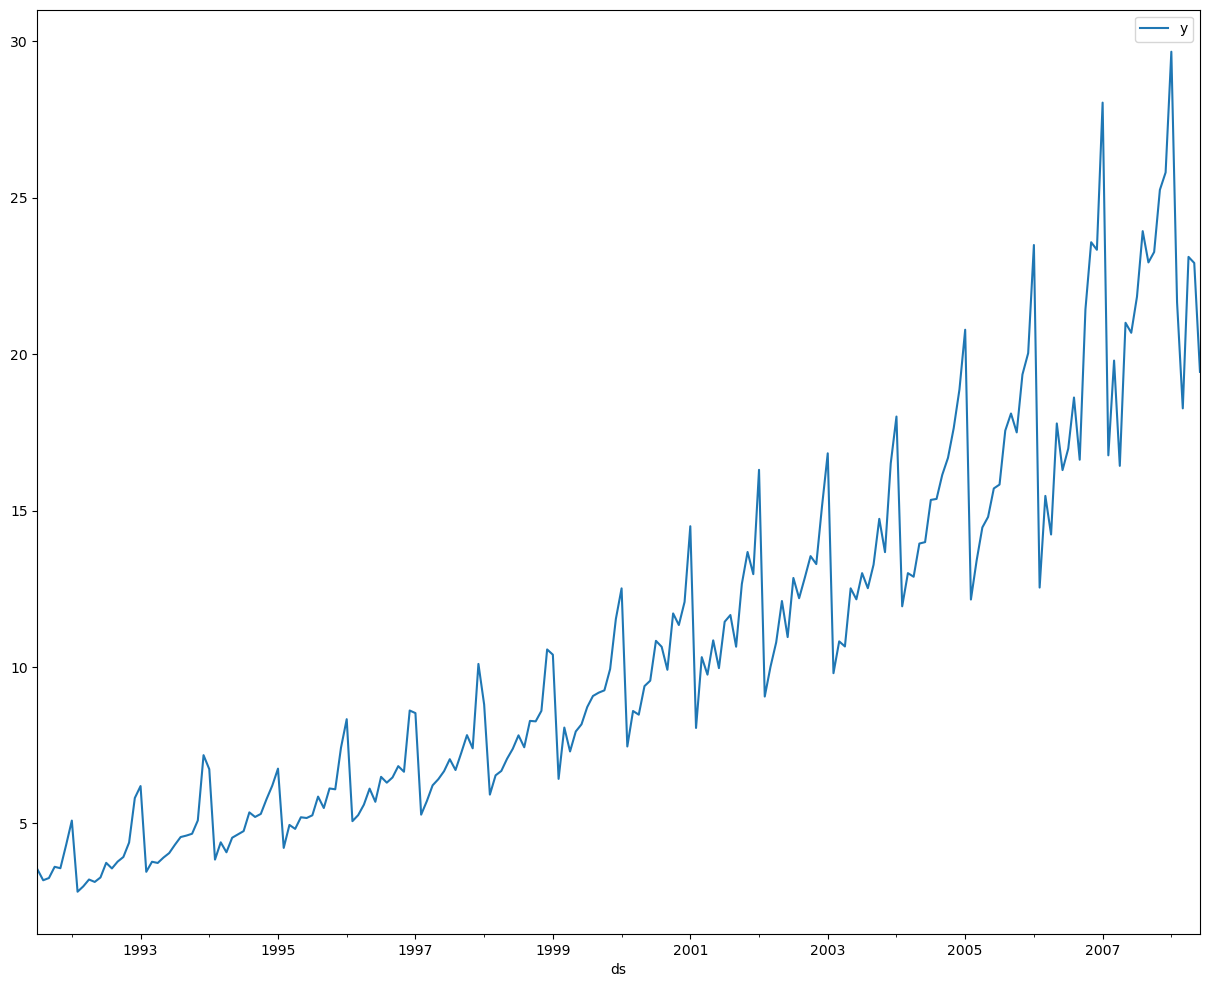

In [5]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
ts.plot()

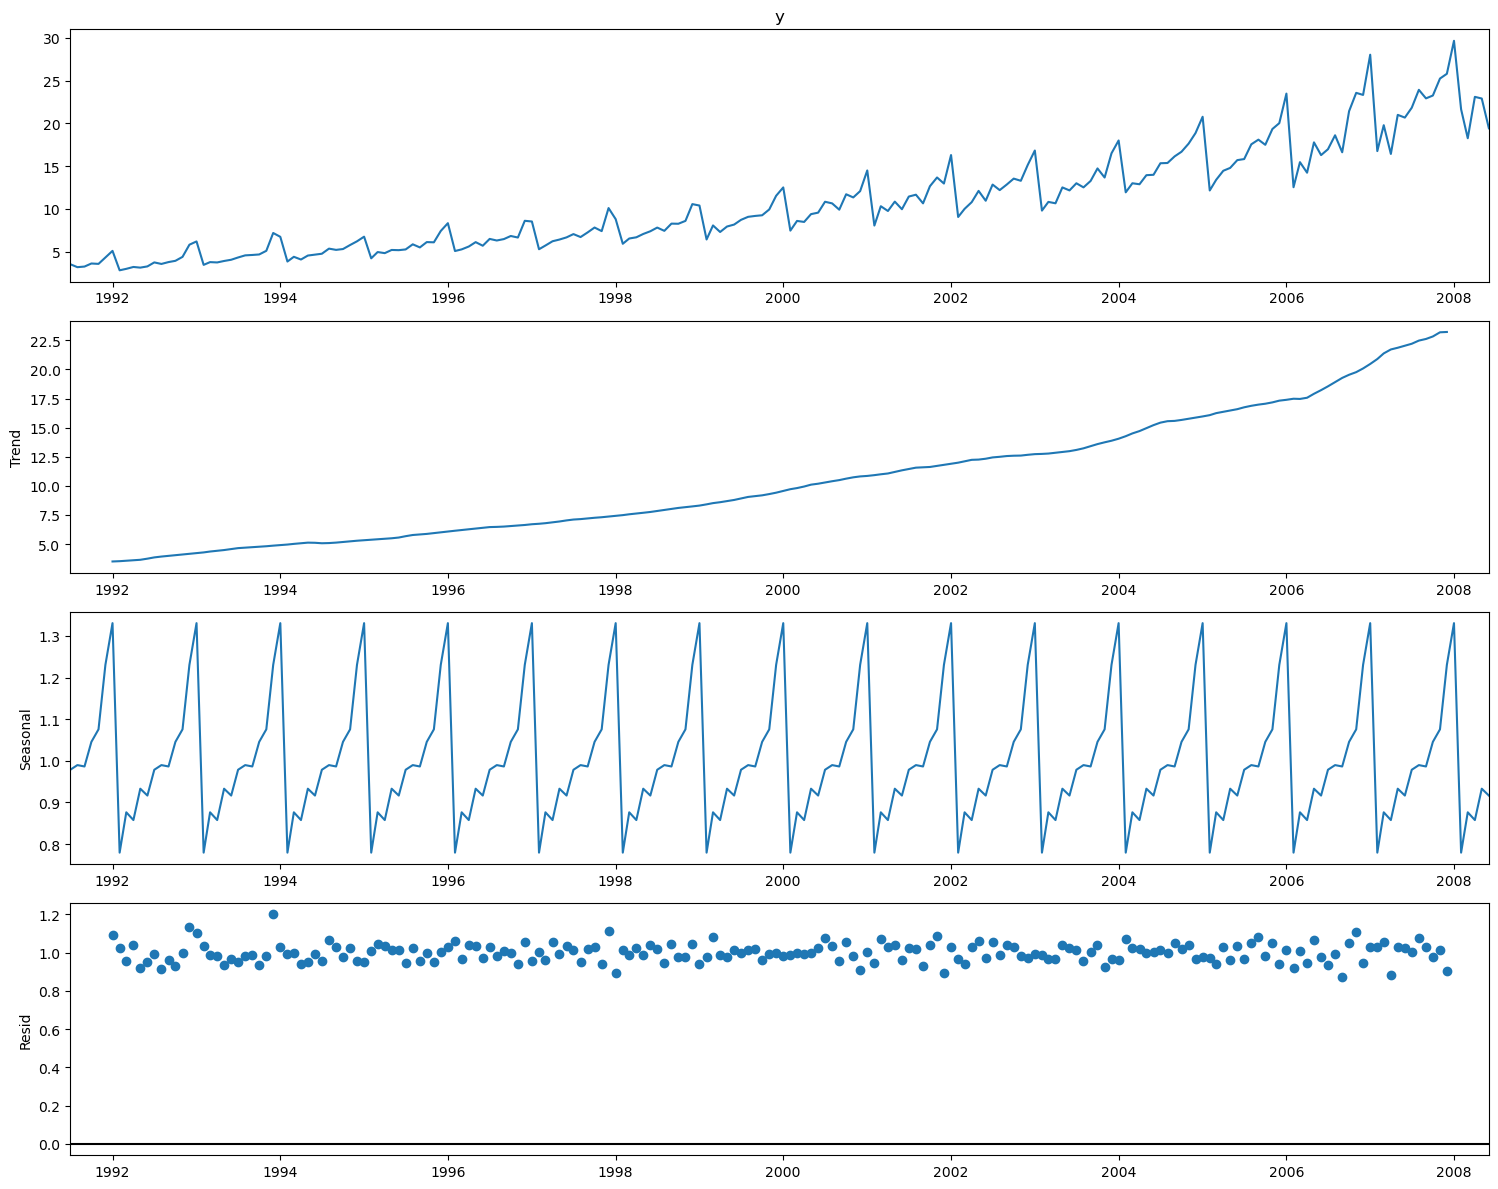

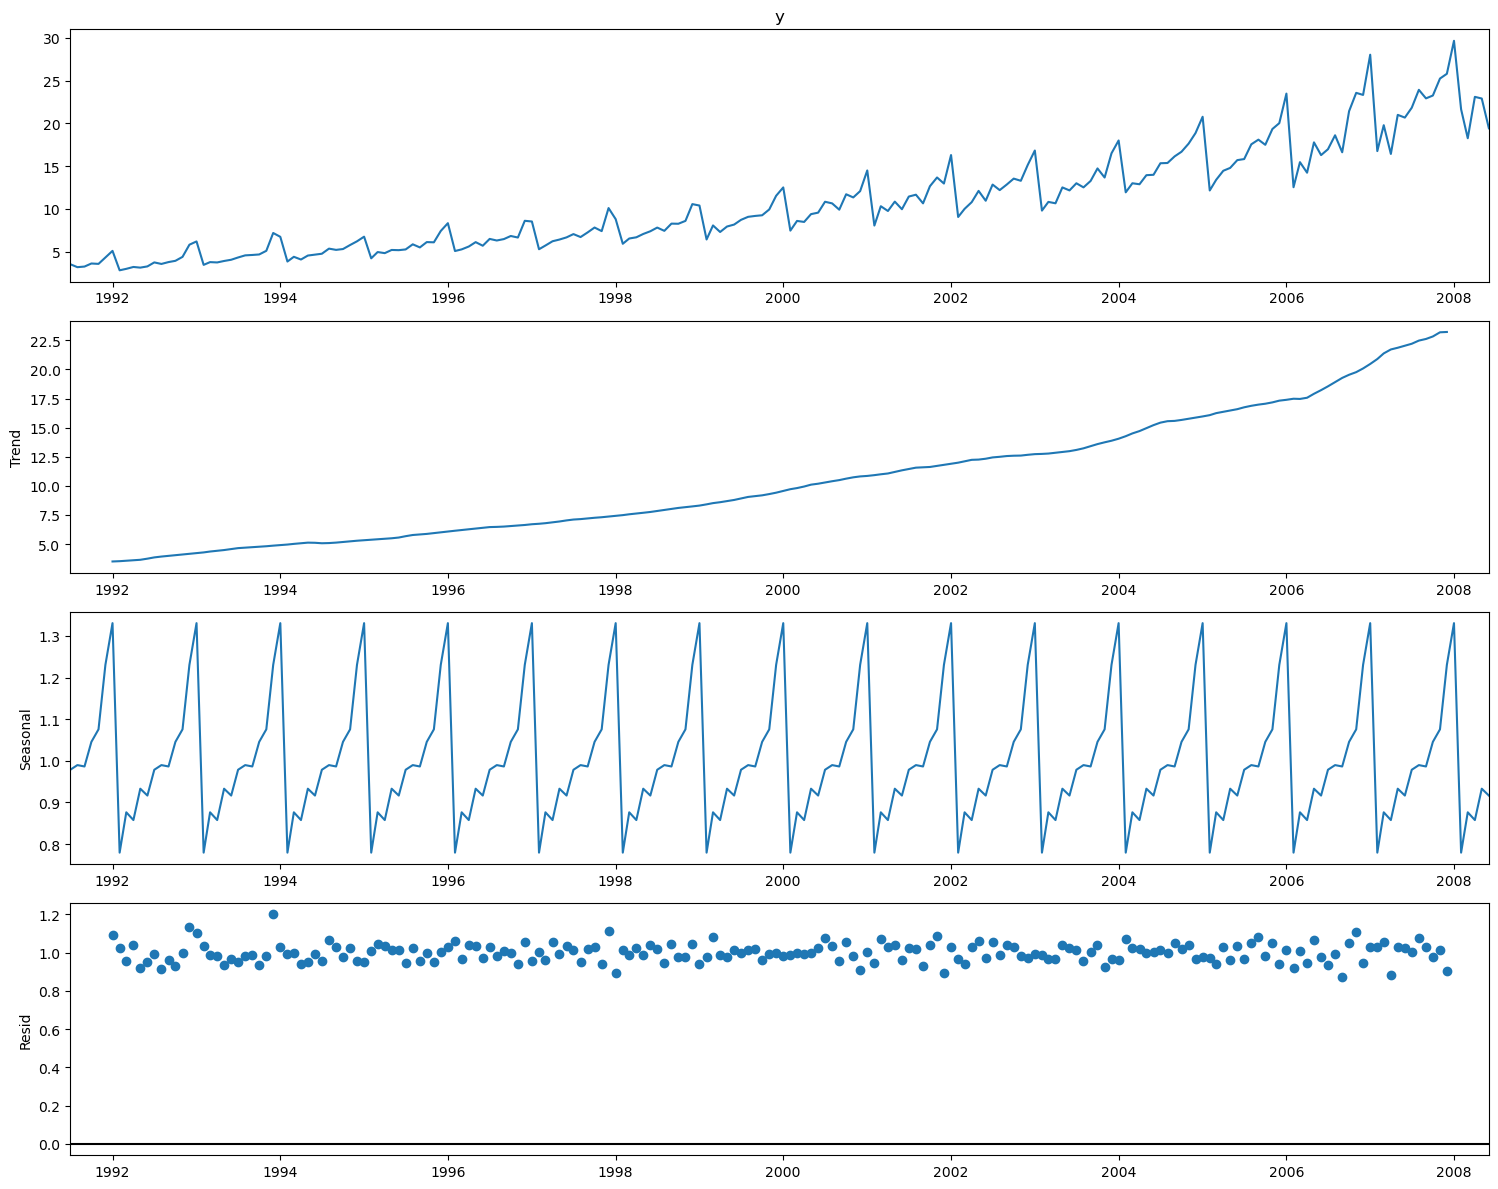

In [6]:
plt.rcParams["figure.figsize"] = (15,12)
result =seasonal_decompose(ts['y'],model='multipicative')
result.plot()

In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

stepwise_fit =auto_arima(ts['y'],start_p=1,start_q=1, \
                        max_p=8,max_q=8,m=12,seasonal=True,\
                        d=1,D=1,trace=True,error_action='ignore',\
                        suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=527.119, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=659.245, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=560.558, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=529.539, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=525.634, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=554.767, Time=0.07 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=526.728, Time=0.57 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=530.976, Time=0.19 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=529.073, Time=2.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=553.046, Time=0.33 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=529.582, Time=0.78 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=527.568, Time=0.97 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=634.870, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=526.962, Time=0.44 sec
 ARIMA(2,1,0)(0,1,1)[12]         

In [8]:
#To print the summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -252.988
Date:                            Wed, 15 Mar 2023   AIC                            519.977
Time:                                    07:32:20   BIC                            542.743
Sample:                                         0   HQIC                           529.198
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2112      0.126     -1.683      0.092      -0.457       0.035
ar.L2          0.1221      0.120      1.018      0.309      -0.113       0.357
ar.L3          0.1174      0.090      1.311      0.190      -0.058       0.293
ar.L4         -0.2340      0.077     -3.021      0.003      -0.386      -0.082
ma.L1         -0.7149      0.113     -6.315      0.000      -0.937      -0.493
ma.S.L12      -0.4786      0.063     -7.613      0.000      -0.602      -0.355
sigma2         0.8086      0.053     15.389      0.000       0.706       0.912
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               176.72
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              15.18   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
len(ts)

204

In [10]:
train=ts.iloc[:192]
test=ts.iloc[192:]

In [11]:
print(len(train))
print(len(test))

192
12


In [12]:
#Fit a SARIMAX(0,1,1)x(2,1,[],12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['y'],order=(4,1,1),seasonal_order=(0,1,1,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -204.231
Date:                            Wed, 15 Mar 2023   AIC                            422.462
Time:                                    07:32:21   BIC                            444.773
Sample:                                07-01-1991   HQIC                           431.509
                                     - 06-01-2007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0860      0.098      0.873      0.383      -0.107       0.279
ar.L2          0.2831      0.092      3.090      0.002       0.104       0.463
ar.L3          0.1444      0.101      1.427      0.154      -0.054       0.343
ar.L4         -0.0789      0.074     -1.064      0.287      -0.224       0.066
ma.L1         -0.8995      0.101     -8.944      0.000      -1.097      -0.702
ma.S.L12      -0.2158      0.072     -2.987      0.003      -0.357      -0.074
sigma2         0.5680      0.043     13.309      0.000       0.484       0.652
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                95.02
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.70   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predictions = result.predict(192,203,typ='levels').rename("Predictions")
len(predictions)

12

<AxesSubplot:xlabel='ds'>

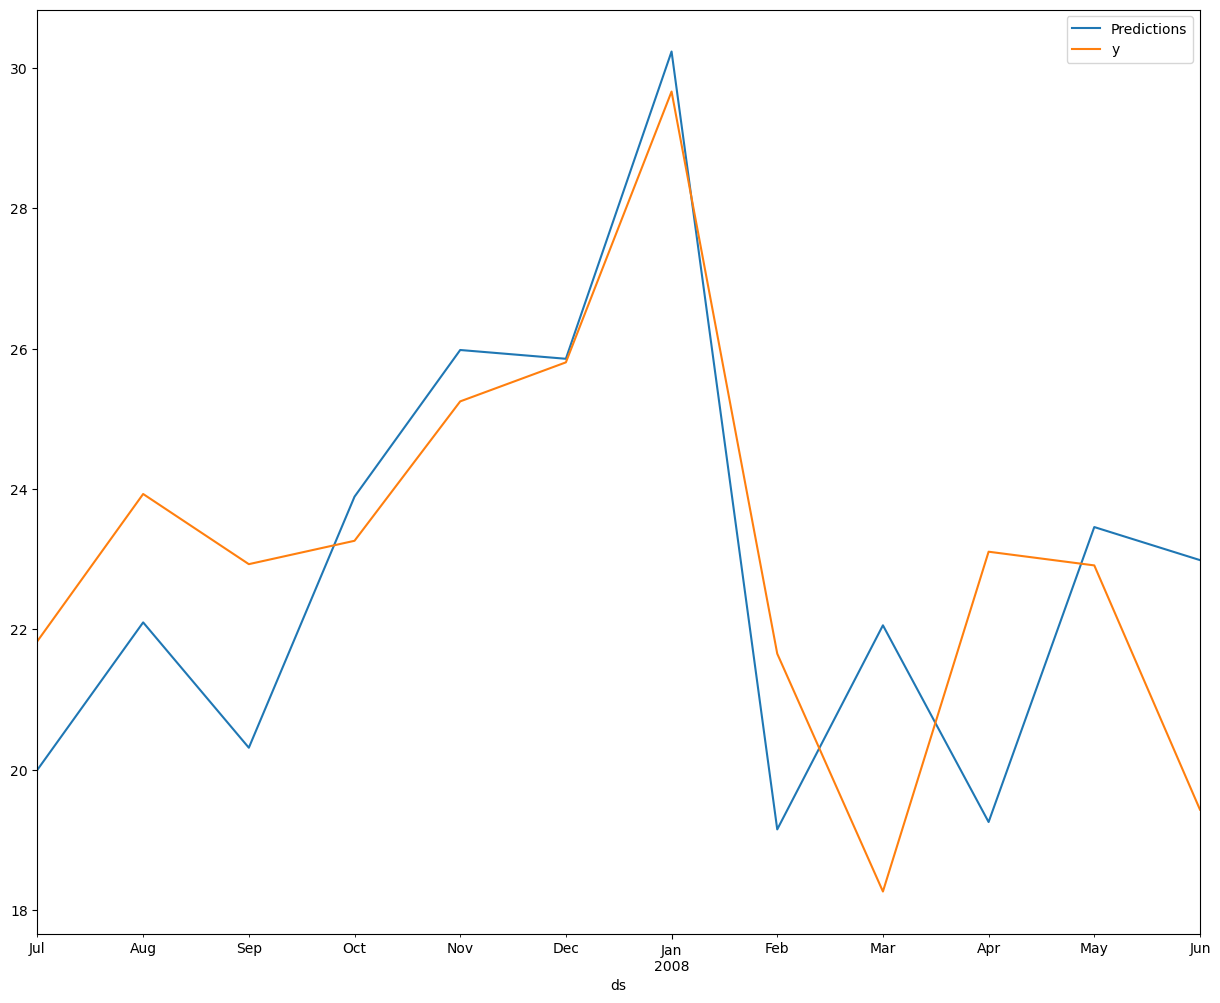

In [14]:
#plot
predictions.plot(legend=True)
test['y'].plot(legend=True)

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(test['y'],predictions)#mape-mean abosulte per error

8.739126330583641

In [16]:
#Training model on full dataset
model=SARIMAX(ts['y'],order=(4,1,1),seasonal_order=(0,1,1,12))
result=model.fit()

In [17]:
#Forecast for next 3 years
forecast=result.predict(start=204, end=239,typ='leveles').rename('Forecasr')

In [18]:
#Export the forecasted values
forecast.to_csv("Forecasted_Price.csv")